# **Title of Project**

Fake News Prediction

## **Objective**

To check whether the news is fake or real using machine learning models

## **Data Source**

kaggle

## **Import Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
import nltk
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BHUVI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **Import Data**

In [3]:
df = pd.read_csv('train.csv')
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


## **Describe Data**

In [4]:
df.shape

(20800, 5)

In [5]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

## **Data Visualization**

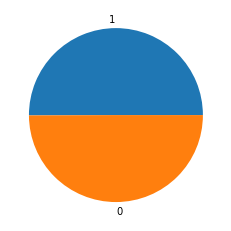

In [7]:
count = df['label'].value_counts()
plt.pie(count, labels = ['1','0'])
plt.show()

## **Data Preprocessing**

In [8]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [9]:
df = df.fillna('')

In [10]:
df['content'] = df['author']+' '+df['title']

In [11]:
print(df['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


## **Define Target Variable (y) and Feature Variables (X)**

In [12]:
X = df.drop(columns='label', axis=1)
Y = df['label']

In [13]:
print(X)
print(Y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

## **Train Test Split**

In [14]:
port_stem = PorterStemmer()

In [15]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [16]:
df['content'] = df['content'].apply(stemming)

In [17]:
X = df['content'].values
Y = df['label'].values

In [18]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [19]:
train_x, val_x, train_y, val_y = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

## **Modeling**

In [20]:
model_lr = LogisticRegression()
model_lr.fit(train_x, train_y)
preds = model_lr.predict(val_x)
score_lr = accuracy_score(val_y, preds)

In [21]:
model_rfc = RandomForestClassifier(n_estimators=500, random_state=42, max_depth=10)    
model_rfc.fit(train_x, train_y)
preds = model_rfc.predict(val_x)
score_rfc = accuracy_score(val_y, preds)

In [22]:
model_dtc = DecisionTreeClassifier(max_depth=50, random_state=42)
model_dtc.fit(train_x, train_y)
preds = model_dtc.predict(val_x)
score_dtc = accuracy_score(val_y, preds)

## **Model Evaluation**

In [23]:
print(score_lr)
print(score_rfc)
print(score_dtc)

0.9790865384615385
0.9209134615384615
0.9901442307692307


## **Prediction**

In [24]:
X_new = val_x[5]
prediction_lr = model_lr.predict(X_new)
print(prediction_lr)

prediction_rfc = model_rfc.predict(X_new)
print(prediction_rfc)

prediction_dtc = model_dtc.predict(X_new)
print(prediction_dtc)

if (prediction_lr[0]):
    print('The news is Fake according to logistic regression')
else:
    print('The news is real according to logistic regression')

if (prediction_rfc[0]):
    print('The news is Fake according to Random Forest Classifier')
else:
    print('The news is real according to Random Forest Classifier')

if (prediction_dtc[0]):
    print('The news is Fake according to Decision Tree Classifier')
else:
    print('The news is real according to Decision Tree Classifier ')

[1]
[1]
[1]
The news is Fake according to logistic regression
The news is Fake according to Random Forest Classifier
The news is Fake according to Decision Tree Classifier


## **Explaination**

This project uses machine learning models to determine whether the given news is fake or real and it includes data Visualization, preprocessing, evaluation and prediction. Machine learning models are used for prediction.